# Make the parallel coordinate plots and find the best model configuration

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
dw = pd.read_csv("tunedW.csv")
du = pd.read_csv("tunedU.csv")

In [37]:
nan = dw['max_depth'][7] 
dfw = dw.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])
dfu = du.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])


/var/folders/dd/vs2td51d7b366p_g2_844p100000gq/T/ipykernel_4950/1885693186.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfw = dw.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])
/var/folders/dd/vs2td51d7b366p_g2_844p100000gq/T/ipykernel_4950/1885693186.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfu = du.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])


In [58]:
def parallel_coordinates(frame, class_column, case, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None, savefig=False,
                     **kwds):

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if case =='U':
        name = 'Upsampled Data'
    if case == 'W':
        name = 'Cost-sensitive Learning'

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    cmap = mpl.cm.viridis_r # viridis, magma
    bounds = np.linspace(0.02,0.09,29)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N, extend='both')
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        color = scalar_map.to_rgba(class_col[i])
        ax.plot(x, y, color=color, alpha=0.3, **kwds)
        # ax.set_ylim([min(y),max(y)])

    for i in x:
        ax.axvline(i, linewidth=1, color='black')
    ax.text(1,148,'- None')
        

    ax1 = ax.twinx()
    ax1.set_yticks([0.27,0.5,0.72])
    ax1.set_yticklabels(['gini','entropy','log_loss'])

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.set_title(f'Parallel Coordinate Plot of Hyperparameters \n {name}')
    ax.grid()

    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                        ax=ax,
                        orientation='horizontal', label='log-loss'
                        )
    cbar_ax = cbar.ax
    cbar_ax.set_xticks([0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09])
    cbar_ax.set_xticklabels(['0.02','0.03','0.04','0.05','0.06','0.07','0.08','0.09'])

    if savefig:
        plt.savefig(f'figures/Hyper{case}.png')

    return 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


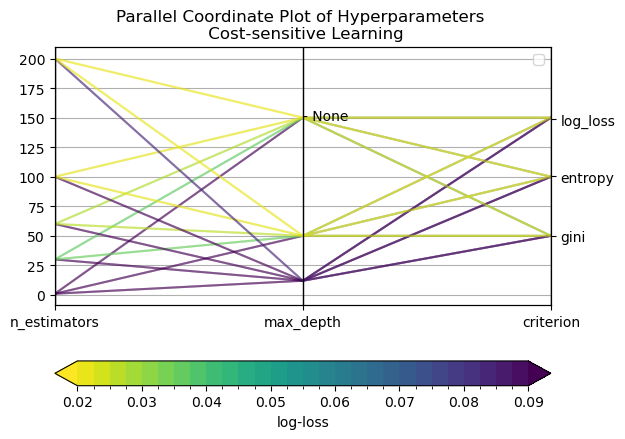

In [59]:
df = dfw[['n_estimators','max_depth','criterion','LL_RF_w']]
parallel_coordinates(df, 'LL_RF_w',case='W',savefig=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


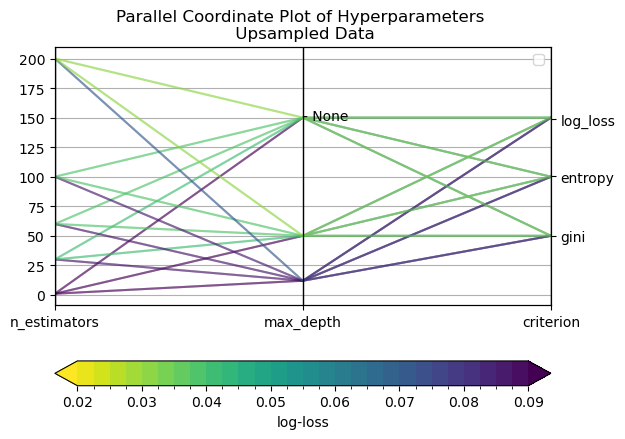

In [60]:
df = dfu[['n_estimators','max_depth','criterion','LL_RF_up']]
parallel_coordinates(df, 'LL_RF_up',case='U',savefig=True)